In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#导入数据
data=pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
#查看数据类型
print(pd.DataFrame(data.dtypes))

                               0
Administrative             int64
Administrative_Duration  float64
Informational              int64
Informational_Duration   float64
ProductRelated             int64
ProductRelated_Duration  float64
BounceRates              float64
ExitRates                float64
PageValues               float64
SpecialDay               float64
Month                     object
OperatingSystems           int64
Browser                    int64
Region                     int64
TrafficType                int64
VisitorType               object
Weekend                     bool
Revenue                     bool


In [4]:
#查看缺失值
print(pd.DataFrame(data.isnull().sum()).T)
#发现没有缺失值

   Administrative  Administrative_Duration  Informational  \
0               0                        0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                       0               0                        0   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0            0          0           0           0      0                 0   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
0        0       0            0            0        0        0  


In [5]:
#简单描述性统计
print(data.describe().round(2).T)

                           count     mean      std  min     25%     50%  \
Administrative           12330.0     2.32     3.32  0.0    0.00    1.00   
Administrative_Duration  12330.0    80.82   176.78  0.0    0.00    7.50   
Informational            12330.0     0.50     1.27  0.0    0.00    0.00   
Informational_Duration   12330.0    34.47   140.75  0.0    0.00    0.00   
ProductRelated           12330.0    31.73    44.48  0.0    7.00   18.00   
ProductRelated_Duration  12330.0  1194.75  1913.67  0.0  184.14  598.94   
BounceRates              12330.0     0.02     0.05  0.0    0.00    0.00   
ExitRates                12330.0     0.04     0.05  0.0    0.01    0.03   
PageValues               12330.0     5.89    18.57  0.0    0.00    0.00   
SpecialDay               12330.0     0.06     0.20  0.0    0.00    0.00   
OperatingSystems         12330.0     2.12     0.91  1.0    2.00    2.00   
Browser                  12330.0     2.36     1.72  1.0    2.00    2.00   
Region                   

相关性：
                         Administrative  Administrative_Duration  \
Administrative                     1.00                     0.60   
Administrative_Duration            0.60                     1.00   
Informational                      0.38                     0.30   
Informational_Duration             0.26                     0.24   
ProductRelated                     0.43                     0.29   
ProductRelated_Duration            0.37                     0.36   
BounceRates                       -0.22                    -0.14   
ExitRates                         -0.32                    -0.21   
PageValues                         0.10                     0.07   
SpecialDay                        -0.09                    -0.07   
OperatingSystems                  -0.01                    -0.01   
Browser                           -0.03                    -0.02   
Region                            -0.01                    -0.01   
TrafficType                       -0.03    

True

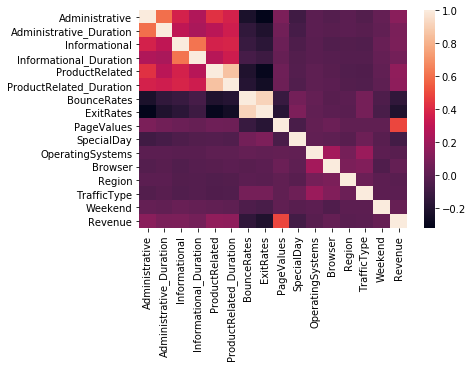

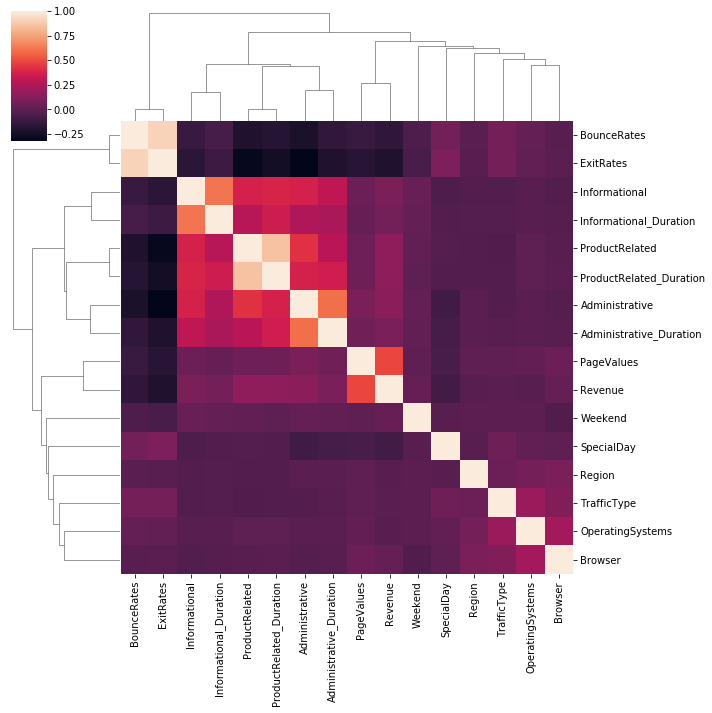

In [6]:
#corr()相关性分析
def Corr(inputfile):
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("相关性：")
    print(data.corr().round(2).T)
    print("相关性热力图：")
    print(sns.heatmap(data.corr()))
    print("分层相关性热力图：")
    print(sns.clustermap(data.corr()))
    return True
Corr('online_shoppers_intention.csv')

In [7]:
# 对object非数值型对象和bool对象编码，onehot编码
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
import pandas as pd
#对等级变量编码
X = data.iloc[:,[10,15,16]]
X.head()

,Month,VisitorType,Weekend
0,Feb,Returning_Visitor,False
1,Feb,Returning_Visitor,False
2,Feb,Returning_Visitor,False
3,Feb,Returning_Visitor,False
4,Feb,Returning_Visitor,True


In [8]:
enc=OneHotEncoder(categories='auto').fit(X)
X1=enc.transform(X).toarray()
X1

array([[0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [9]:
#输出新特征变量名
enc.get_feature_names()

array(['x0_Aug', 'x0_Dec', 'x0_Feb', 'x0_Jul', 'x0_June', 'x0_Mar',
       'x0_May', 'x0_Nov', 'x0_Oct', 'x0_Sep', 'x1_New_Visitor',
       'x1_Other', 'x1_Returning_Visitor', 'x2_False', 'x2_True'],
      dtype=object)

In [11]:
#添加到原来数据表中
newdata = pd.concat([data,pd.DataFrame(X1)],axis=1)
newdata.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,5,6,7,8,9,10,11,12,13,14
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [12]:
#将原来的三列去掉，给新变量命名，写入新数据文件
newdata.drop(["Month","VisitorType","Weekend"],axis=1,inplace=True)
newdata.columns =["Administrative","Administrative_Duration","Informational",
                  "Informational_Duration","ProductRelated",
                  "ProductRelated_Duration","BounceRates","ExitRates",
                  "PageValues","SpecialDay","OperatingSystems","Browser",
                  "Region","TrafficType","Revenue","Aug","Dec","Feb","Jul","June",
                  "Mar","May","Nov","Oct","Sep","New_Visitor","Other",
                  "Returning_Visitor","Weekend_False",
                  "Weekend_True"]
newdata.to_csv("new_shoppers_data.csv")

In [13]:
#再看看数据类型
print(pd.DataFrame(newdata.dtypes))

                               0
Administrative             int64
Administrative_Duration  float64
Informational              int64
Informational_Duration   float64
ProductRelated             int64
ProductRelated_Duration  float64
BounceRates              float64
ExitRates                float64
PageValues               float64
SpecialDay               float64
OperatingSystems           int64
Browser                    int64
Region                     int64
TrafficType                int64
Revenue                     bool
Aug                      float64
Dec                      float64
Feb                      float64
Jul                      float64
June                     float64
Mar                      float64
May                      float64
Nov                      float64
Oct                      float64
Sep                      float64
New_Visitor              float64
Other                    float64
Returning_Visitor        float64
Weekend_False            float64
Weekend_Tr

In [80]:
#将标签列手动放在最后一列，去掉Revenue标签列
data=pd.read_csv('new_shoppers_data1.csv')
data.head()
clu_data=newdata.iloc[:,]
y=newdata.iloc[:,-1]
clu_data.head()
#y.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [81]:
#StandardScaler标准化
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()    #实例化
result=scaler.fit_transform(clu_data) #训练生成均值和方差，并导出结果
result 

array([[-0.69699296, -0.4571914 , -0.3964779 , ...,  0.41062101,
         0.55055169, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  0.41062101,
         0.55055169, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  0.41062101,
         0.55055169, -0.55055169],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  0.41062101,
        -1.81635987,  1.81635987],
       [ 0.50722805, -0.03291592, -0.3964779 , ...,  0.41062101,
         0.55055169, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -2.43533571,
        -1.81635987,  1.81635987]])

In [82]:
#利用公式标准化
X=(clu_data-clu_data.mean(axis=0))/(clu_data.std(axis=0))
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,Weekend_False,Weekend_True
0,-0.696965,-0.457173,-0.396462,-0.244921,-0.690975,-0.624322,3.667040,3.229185,-0.317165,-0.308809,...,-0.427722,-0.612507,-0.566775,-0.215863,-0.194168,-0.399071,-0.083313,0.410604,0.550529,-0.550529
1,-0.696965,-0.457173,-0.396462,-0.244921,-0.668491,-0.590879,-0.457664,1.171425,-0.317165,-0.308809,...,-0.427722,-0.612507,-0.566775,-0.215863,-0.194168,-0.399071,-0.083313,0.410604,0.550529,-0.550529
2,-0.696965,-0.457173,-0.396462,-0.244921,-0.690975,-0.624322,3.667040,3.229185,-0.317165,-0.308809,...,-0.427722,-0.612507,-0.566775,-0.215863,-0.194168,-0.399071,-0.083313,0.410604,0.550529,-0.550529
3,-0.696965,-0.457173,-0.396462,-0.244921,-0.668491,-0.622929,0.573512,1.994529,-0.317165,-0.308809,...,-0.427722,-0.612507,-0.566775,-0.215863,-0.194168,-0.399071,-0.083313,0.410604,0.550529,-0.550529
4,-0.696965,-0.457173,-0.396462,-0.244921,-0.488617,-0.296418,-0.045194,0.142545,-0.317165,-0.308809,...,-0.427722,-0.612507,-0.566775,-0.215863,-0.194168,-0.399071,-0.083313,0.410604,-1.816286,1.816286


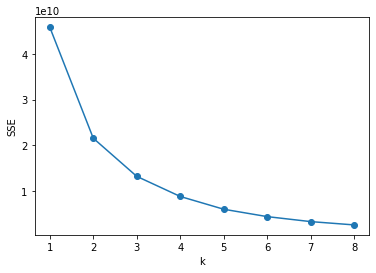

In [83]:
#手肘法选取最佳聚类数k
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
SSE = []  # 存放每次结果的误差平方和
for k in range(1,9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(clu_data)
    SSE.append(estimator.inertia_)
xx= range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(xx,SSE,'o-')
plt.show()

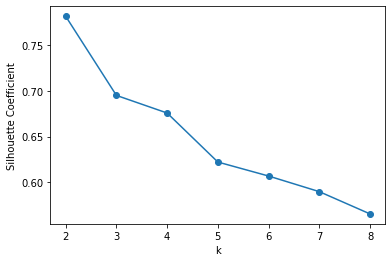

In [55]:
from sklearn.metrics import silhouette_score
Scores = []  # 存放轮廓系数
for k in range(2,9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(clu_data)
    Scores.append(silhouette_score(clu_data,estimator.labels_,metric='euclidean'))
xxx= range(2,9)
plt.xlabel('k')
plt.ylabel('Silhouette Coefficient')
plt.plot(xxx,Scores,'o-')
plt.show()

In [ ]:
#综上，轮廓系数3的时候SSE还很高，所以选4个簇

In [84]:
#K均值聚类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
X1=np.array(X)
kmeans.fit(X1)
print(kmeans.labels_) #类别
print(kmeans.cluster_centers_) #聚类中心

[3 0 3 ... 2 0 1]
[[ 5.24718698e-02  3.29933527e-02  4.52257523e-02  3.14726820e-02
   1.19138946e-01  1.15501187e-01 -2.51619153e-01 -2.08935501e-01
  -2.82281762e-02  1.08422887e-02 -2.90443843e-02 -6.88070535e-03
  -1.76144018e-02 -4.82829339e-02 -2.16284984e-02  1.13627329e-02
  -2.63588661e-02  1.23127607e-02  3.63291120e-03  7.47695161e-03
   9.11889260e-04  2.53704711e-02 -1.25647861e-02 -6.95159897e-03
  -5.55784178e-03 -3.99070777e-01 -8.33129392e-02  4.10604354e-01
   5.50529366e-01 -5.50529366e-01]
 [ 7.52610568e-02  6.81404184e-02 -1.33118876e-01 -1.07324718e-01
  -3.03737120e-01 -2.84830927e-01 -4.18543142e-01 -5.13499929e-01
   2.97612118e-01 -2.11395670e-01  6.57956577e-02  1.33252830e-01
   1.19699223e-01  5.21999778e-02  2.70548027e-01  3.16604105e-02
   2.29517579e-01 -1.18320048e-01 -2.43166221e-02 -4.00987356e-02
  -5.93073470e-02 -2.07265969e-01  3.20405636e-03  1.25235187e-01
   1.38673101e-01  2.39003344e+00  3.97589084e-01 -2.43523695e+00
  -1.01914606e-01  1.01

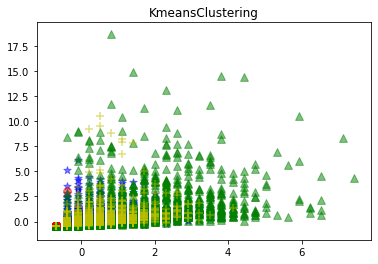

In [68]:
markers = [['*','b'],['o','r'],['^','g'],['+','y']]
for i in range(4):
    members = kmeans.labels_ == i #members是布尔数组
    plt.scatter(X1[members,0],X1[members,1],s = 60,marker=markers[i][0],c=markers[i][1], alpha=0.5)
plt.title('KmeansClustering')
plt.show()

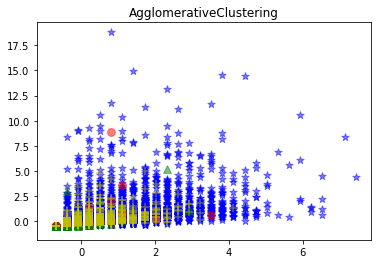

In [106]:
#层次聚类
from sklearn.cluster import AgglomerativeClustering

cls=AgglomerativeClustering(linkage='ward',n_clusters=4).fit(X1)
cls.labels_
markers = [['*','b'],['o','r'],['^','g'],['+','y']]
for i in range(4):
    members = cls.labels_ == i #members是布尔数组
    plt.scatter(X1[members,0],X1[members,1],s = 60,marker=markers[i][0],c=markers[i][1], alpha=0.5)
plt.title('AgglomerativeClustering')
plt.show()

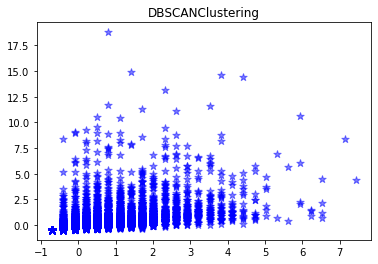

In [122]:
#密度聚类
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=2000,min_samples=1).fit(X1)
dbs.labels_
markers = [['*','b'],['o','r'],['^','g'],['+','y']]
for i in range(4):
    members = dbs.labels_ == i #members是布尔数组
    plt.scatter(X1[members,0],X1[members,1],s = 60,marker=markers[i][0],c=markers[i][1], alpha=0.5)
plt.title('DBSCANClustering')
plt.show()

In [123]:
#有监督评估
#ARI
from sklearn.metrics.cluster import adjusted_rand_score
print(adjusted_rand_score(labels_true=y, labels_pred=kmeans.labels_))
print(adjusted_rand_score(labels_true=y, labels_pred=cls.labels_))
print(adjusted_rand_score(labels_true=y, labels_pred=dbs.labels_))
#聚类效果都不好，k-means稍微好一些

0.522698374521408
-0.004379568329340887
0.0


In [124]:
#MI
from sklearn.metrics.cluster import adjusted_mutual_info_score
print(adjusted_mutual_info_score(labels_true=y, labels_pred=kmeans.labels_))
print(adjusted_mutual_info_score(labels_true=y, labels_pred=cls.labels_))
print(adjusted_mutual_info_score(labels_true=y, labels_pred=dbs.labels_))

0.5164179899294215
0.004605442057493029
0.0


In [125]:
#拓展
#Homogeneity, completeness and V-measure
#同质性homogeneity：每个群集只包含单个类的成员;完整性completeness：给定类的所有成员都分配给同一个群集
from sklearn import metrics
print(metrics.homogeneity_score(y, kmeans.labels_)) 
print(metrics.homogeneity_score(y, cls.labels_)) 
print(metrics.homogeneity_score(y, dbs.labels_))

print(metrics.completeness_score(y, kmeans.labels_)) 
print(metrics.completeness_score(y, cls.labels_)) 
print(metrics.completeness_score(y, dbs.labels_))

#两者的调和平均V-measure
print(metrics.v_measure_score(y, kmeans.labels_)) 
print(metrics.v_measure_score(y, cls.labels_)) 
print(metrics.v_measure_score(y, dbs.labels_))

#跟ARI,MI指标差不多

0.7842069019776801
0.0051774658767292205
0.0
0.3850415702317793
0.004497807709259805
1.0
0.5164894615658615
0.004813764846609615
0.0


In [126]:
#无监督评估
#轮廓系数，越大越好
print(metrics.silhouette_score(X1,kmeans.labels_, metric='euclidean'))
print(metrics.silhouette_score(X1,cls.labels_,metric='euclidean'))
print(metrics.silhouette_score(X1,dbs.labels_,metric='euclidean'))

0.1298471972330615
0.1020032252409635


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [127]:
#Calinski-Harabasz分数，ss越大则聚类效果越好
print(metrics.calinski_harabaz_score(X1,kmeans.labels_))
print(metrics.calinski_harabaz_score(X1,cls.labels_))
print(metrics.calinski_harabaz_score(X1,dbs.labels_))

901.4011732505566
678.9194714516245


E:\secondanacondainstallpath\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
E:\secondanacondainstallpath\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
E:\secondanacondainstallpath\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
#综上，dbscan不适用于此数据集，太离散了，都成了噪声了。K-means效果最好。